## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

## Assign constant values

In [2]:
FILE_PATH = "./insurance.csv"
AGE_GROUPS = ["teenager", "young adult", "middle-aged adult", "senior citizen"]
SMOKER_VALUES = {"yes": True, "no": False}
BMI_GROUPS = ["underweight", "normal weight", "overweight", "obese"]
SEX_MAPPING = {"male": 0, "female": 1}
REGION_MAPPING = {"northeast": 1, "southeast": 2, "southwest": 3, "northwest": 4}

## Create a DataFrame

In [3]:
df = pd.read_csv(FILE_PATH)

## Explore the imported dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Rename column names

In [5]:
df.rename(
    columns=
    {
        "age": "Age",
        "sex": "Sex",
        "bmi": "BMI",
        "children": "Children",
        "smoker": "Smoker",
        "region": "Region",
        "charges": "Charges",
    },
    inplace=True,
)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Replace the values of the "Smoker" column

In [6]:
smoker_condition = lambda smoker: SMOKER_VALUES.get(smoker)

df["Smoker"] = df["Smoker"].apply(smoker_condition)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


## Useful functions

In [7]:
def get_percentage(column_name: str, search_value: str | int | bool) -> float:
    """Get the percentage of the specified column value.
    
    :param column_name: str: Specify the column name
    :param search_value: str | int | bool: Specify the search value
    :return: Percentage for the search value, rounded to 3 decimal places
    """
    percentage = round(
        sum(df[column_name] == search_value) / df[column_name].count() * 100,
        3,
    )
    
    return percentage

In [8]:
def get_average_value_by_column(column_name: str, decimals: int = 0) -> float:
    """Get the average value of the specified column name.
    
    :param column_name: str: Specify the column name
    :param decimals: int: Specify the number of decimal places
    :return: Average value rounded to the specified decimal places
    """
    average_value_by_column = round(df[column_name].mean(), decimals)
    
    return average_value_by_column

In [9]:
def get_average_value_by_group(
        group_by_column_name: str, aggregate_by_column_name: str
) -> DataFrame:
    """Get the average value for each group.
    
    :param group_by_column_name: str: Specify the column name by which to
        group the DataFrame
    :param aggregate_by_column_name: Specify the column name by which to
        aggregate the DataFrame
    :return: A DataFrame
    """
    average_value_by_group = (
        df.groupby(group_by_column_name)[aggregate_by_column_name]
        .mean()
        .round(decimals=3)
        .reset_index()
    )
    
    return average_value_by_group

In [10]:
def add_values(df_by_group: DataFrame) -> None:
    """Add a value to each bar chart.
    
    :param df_by_group: DataFrame: Specify the grouped DataFrame output
    :return: None
    """
    for i, value in enumerate(df_by_group.values):
        plt.text(
            x=i,
            y=value[1] // 2,
            s=value[1],
            ha="center",
            va="center",
        )

In [11]:
def add_value(df_by_group: DataFrame, average_value: float) -> None:
    """Add a value to horizontal line.
    
    :param df_by_group: DataFrame: Specify the grouped DataFrame output
    :param average_value: float: Specify the average value
    :return: None
    """
    plt.text(
        x=len(df_by_group) // 2 - 0.5,
        y=average_value,
        s=str(average_value),
        ha="center",
        va="bottom",
    )

## Percentage of males and females in the dataset

In [12]:
male_percentage = get_percentage(column_name="Sex", search_value="male")
female_percentage = get_percentage(column_name="Sex", search_value="female")

print(f"The percentage of males in the dataset is {male_percentage}%")
print(f"The percentage of females in the dataset is {female_percentage}%")

The percentage of males in the dataset is 50.523%
The percentage of females in the dataset is 49.477%


## Add age groups to the dataset

In [13]:
age_condition = (
    lambda age: AGE_GROUPS[0]
    if age < 20
    else AGE_GROUPS[1]
    if 20 <= age < 40
    else AGE_GROUPS[2]
    if 40 <= age < 60
    else AGE_GROUPS[3]
)
df["Age Group"] = df["Age"].apply(age_condition)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Age Group
0,19,female,27.900,0,True,southwest,16884.92400,teenager
1,18,male,33.770,1,False,southeast,1725.55230,teenager
2,28,male,33.000,3,False,southeast,4449.46200,young adult
3,33,male,22.705,0,False,northwest,21984.47061,young adult
4,32,male,28.880,0,False,northwest,3866.85520,young adult


## Percentage of people in each age group

In [14]:
percentages_age_groups = [
    get_percentage(column_name="Age Group", search_value=age_group)
    for age_group in AGE_GROUPS
]

for age_group, percentage_age_group in zip(AGE_GROUPS, percentages_age_groups):
    print(
        f'The percentage of "{age_group}" group in the dataset is {percentage_age_group}%'
    )

The percentage of "teenager" group in the dataset is 10.239%
The percentage of "young adult" group in the dataset is 40.135%
The percentage of "middle-aged adult" group in the dataset is 41.106%
The percentage of "senior citizen" group in the dataset is 8.52%


## Average age in the dataset

In [15]:
average_age = get_average_value_by_column(column_name="Age")

print(f"The average age in the dataset is {average_age} years")

The average age in the dataset is 39.0 years


## Add BMI groups to the dataset

In [16]:
bmi_condition = (
    lambda bmi: BMI_GROUPS[0]
    if bmi < 18.5
    else BMI_GROUPS[1]
    if 18.5 <= bmi < 25
    else BMI_GROUPS[2]
    if 25 <= bmi < 30
    else BMI_GROUPS[3]
)

df["BMI Group"] = df["BMI"].apply(bmi_condition)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Age Group,BMI Group
0,19,female,27.900,0,True,southwest,16884.92400,teenager,overweight
1,18,male,33.770,1,False,southeast,1725.55230,teenager,obese
2,28,male,33.000,3,False,southeast,4449.46200,young adult,obese
3,33,male,22.705,0,False,northwest,21984.47061,young adult,normal weight
4,32,male,28.880,0,False,northwest,3866.85520,young adult,overweight


## Percentage of people in each BMI group

In [17]:
percentages_bmi_groups = [
    get_percentage(column_name="BMI Group", search_value=bmi_group)
    for bmi_group in BMI_GROUPS
]

for bmi_group, percentage_bmi_group in zip(BMI_GROUPS, percentages_age_groups):
    print(
        f'The percentage of "{bmi_group}" group in the dataset is {percentage_bmi_group}%'
    )

The percentage of "underweight" group in the dataset is 10.239%
The percentage of "normal weight" group in the dataset is 40.135%
The percentage of "overweight" group in the dataset is 41.106%
The percentage of "obese" group in the dataset is 8.52%


## Average BMI in the dataset

In [18]:
average_bmi = get_average_value_by_column(column_name="BMI", decimals=3)

print(f"The average BMI in the dataset is {average_bmi}")

The average BMI in the dataset is 30.663


## Percentage of people in each region

In [19]:
regions = list(df["Region"].unique())

percentages_regions = [
    get_percentage(column_name="Region", search_value=region)
    for region in regions
]

for region, percentage_region in zip(regions, percentages_regions):
    print(
        f'The percentage of "{region}" region in the dataset is {percentage_region}%'
    )

The percentage of "southwest" region in the dataset is 24.29%
The percentage of "southeast" region in the dataset is 27.205%
The percentage of "northwest" region in the dataset is 24.29%
The percentage of "northeast" region in the dataset is 24.215%


## Percentage of people who do not have children

In [20]:
percentage_people_without_children = get_percentage(column_name="Children", search_value=0)

print(f"The percentage of people without children is {percentage_people_without_children}%")

The percentage of people without children is 42.9%


## Percentage of people who smoke

In [21]:
percentage_smokers = get_percentage(column_name="Smoker", search_value=True)

print(f"The percentage of smokers is {percentage_smokers}%")

The percentage of smokers is 20.478%


## Average charges in the dataset

In [22]:
average_charges = get_average_value_by_column(column_name="Charges", decimals=3)

print(f"The average cost of health insurance in the data set is {average_charges}")

The average cost of health insurance in the data set is 13270.422


## Average charges by sex

In [23]:
average_charges_by_sex = get_average_value_by_group(
    group_by_column_name="Sex", aggregate_by_column_name="Charges"
)

print(average_charges_by_sex)

      Sex    Charges
0  female  12569.579
1    male  13956.751


## Add a "Has Children" column

In [24]:
df["Has Children"] = df["Children"].apply(lambda children: bool(children))

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Age Group,BMI Group,Has Children
0,19,female,27.900,0,True,southwest,16884.92400,teenager,overweight,False
1,18,male,33.770,1,False,southeast,1725.55230,teenager,obese,True
2,28,male,33.000,3,False,southeast,4449.46200,young adult,obese,True
3,33,male,22.705,0,False,northwest,21984.47061,young adult,normal weight,False
4,32,male,28.880,0,False,northwest,3866.85520,young adult,overweight,False


## Average charges for people with and without children

In [25]:
average_charges_by_children = get_average_value_by_group(
    group_by_column_name="Has Children",
    aggregate_by_column_name="Charges",
)

print(average_charges_by_children)

   Has Children    Charges
0         False  12365.976
1          True  13949.941


## Average charges for smoker and non-smoker

In [26]:
average_charges_by_smoker = get_average_value_by_group(
    group_by_column_name="Smoker",
    aggregate_by_column_name="Charges",
)

print(average_charges_by_smoker)

   Smoker    Charges
0   False   8434.268
1    True  32050.232


## Average charges by region

In [27]:
average_charges_by_region = get_average_value_by_group(
    group_by_column_name="Region", aggregate_by_column_name="Charges"
)

print(average_charges_by_region)

      Region    Charges
0  northeast  13406.385
1  northwest  12417.575
2  southeast  14735.411
3  southwest  12346.937


## Average charges by age group

In [28]:
average_charges_by_age_group = get_average_value_by_group(
    group_by_column_name="Age Group", aggregate_by_column_name="Charges"
)

print(average_charges_by_age_group)

           Age Group    Charges
0  middle-aged adult  15431.974
1     senior citizen  21248.022
2           teenager   8407.349
3        young adult  10603.646


## Average charges by BMI group

In [29]:
average_charges_by_bmi_group = get_average_value_by_group(
    group_by_column_name="BMI Group", aggregate_by_column_name="Charges"
)

print(average_charges_by_bmi_group)

       BMI Group    Charges
0  normal weight  10409.338
1          obese  15552.335
2     overweight  10987.510
3    underweight   8852.201


## Replace the sex values with 0 and 1 for male and female respectively

In [30]:
df["Sex"] = df["Sex"].map(SEX_MAPPING)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Age Group,BMI Group,Has Children
0,19,1,27.900,0,True,southwest,16884.92400,teenager,overweight,False
1,18,0,33.770,1,False,southeast,1725.55230,teenager,obese,True
2,28,0,33.000,3,False,southeast,4449.46200,young adult,obese,True
3,33,0,22.705,0,False,northwest,21984.47061,young adult,normal weight,False
4,32,0,28.880,0,False,northwest,3866.85520,young adult,overweight,False


## Replace the region values with the corresponding numeric values

In [31]:
df["Region"] = df["Region"].map(REGION_MAPPING)

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Age Group,BMI Group,Has Children
0,19,1,27.900,0,True,3,16884.92400,teenager,overweight,False
1,18,0,33.770,1,False,2,1725.55230,teenager,obese,True
2,28,0,33.000,3,False,2,4449.46200,young adult,obese,True
3,33,0,22.705,0,False,4,21984.47061,young adult,normal weight,False
4,32,0,28.880,0,False,4,3866.85520,young adult,overweight,False


## Create a heatmap

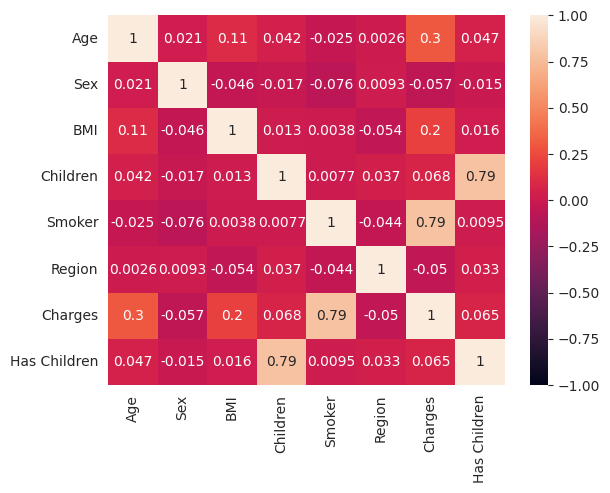

In [32]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="rocket")

plt.show()

## Average charges for each sex

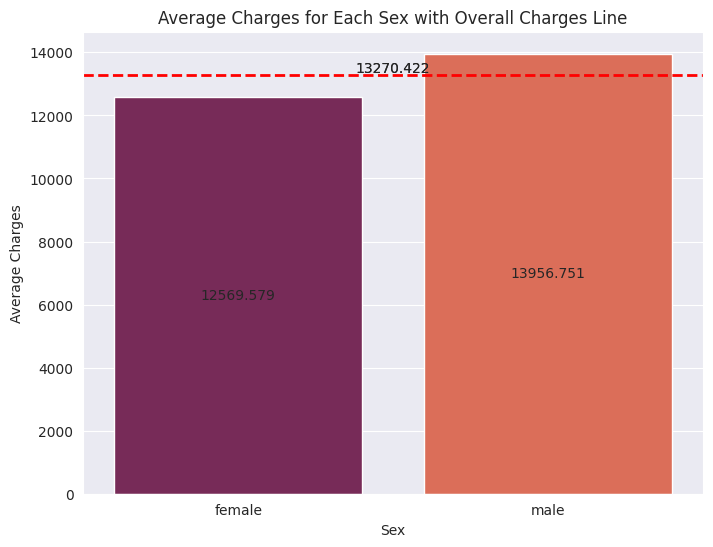

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Sex",
    y="Charges",
    data=average_charges_by_sex,
    hue="Sex",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_sex)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
plt.text(
    x=len(average_charges_by_sex) // 2 - 0.5,
    y=average_charges,
    s=average_charges,
    ha="center",
    va="bottom"
)
add_value(df_by_group=average_charges_by_sex, average_value=average_charges)
plt.title("Average Charges for Each Sex with Overall Charges Line")
plt.xlabel("Sex")
plt.ylabel("Average Charges")

plt.show()

## Average charges for people with and without children

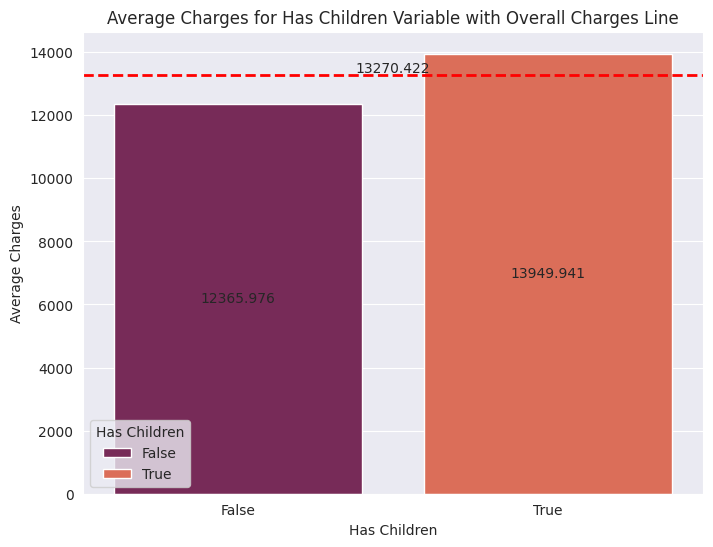

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Has Children",
    y="Charges",
    data=average_charges_by_children,
    hue="Has Children",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_children)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
add_value(df_by_group=average_charges_by_children, average_value=average_charges)
plt.title("Average Charges for Has Children Variable with Overall Charges Line")
plt.xlabel("Has Children")
plt.ylabel("Average Charges")

plt.show()

## Average charges for smoker and non-smokers

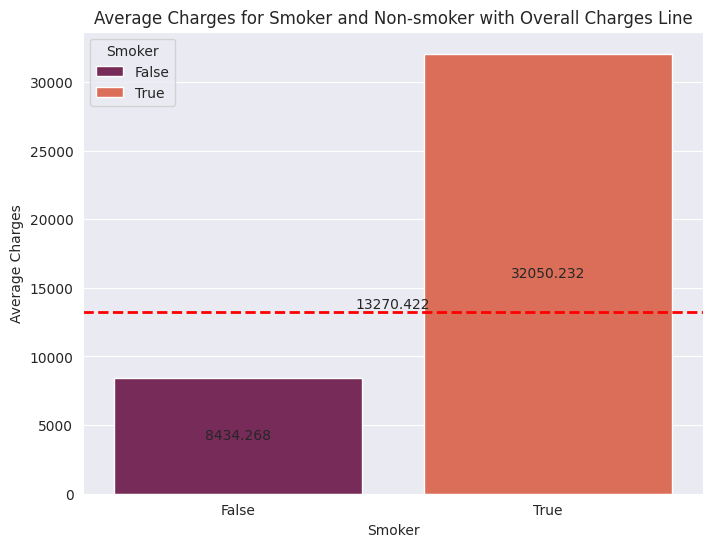

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Smoker",
    y="Charges",
    data=average_charges_by_smoker,
    hue="Smoker",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_smoker)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
add_value(df_by_group=average_charges_by_smoker, average_value=average_charges)
plt.title("Average Charges for Smoker and Non-smoker with Overall Charges Line")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")

plt.show()

## Average charges in each region

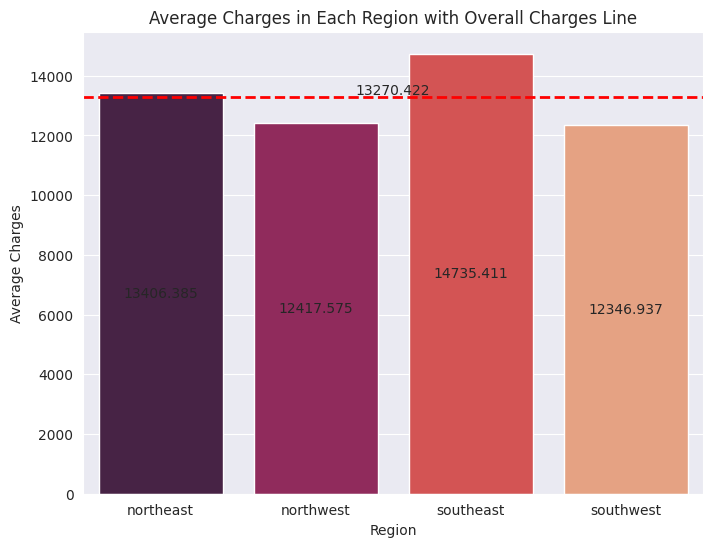

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Region",
    y="Charges",
    data=average_charges_by_region,
    hue="Region",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_region)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
add_value(df_by_group=average_charges_by_region, average_value=average_charges)
plt.title("Average Charges in Each Region with Overall Charges Line")
plt.xlabel("Region")
plt.ylabel("Average Charges")

plt.show()

## Average charges in each age group

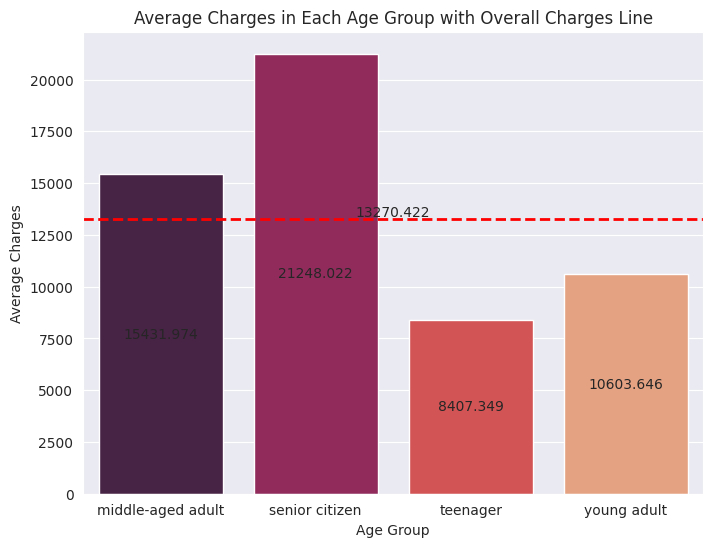

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Age Group",
    y="Charges",
    data=average_charges_by_age_group,
    hue="Age Group",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_age_group)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
add_value(df_by_group=average_charges_by_age_group, average_value=average_charges)
plt.title("Average Charges in Each Age Group with Overall Charges Line")
plt.xlabel("Age Group")
plt.ylabel("Average Charges")

plt.show()

## Average charges in each BMI group

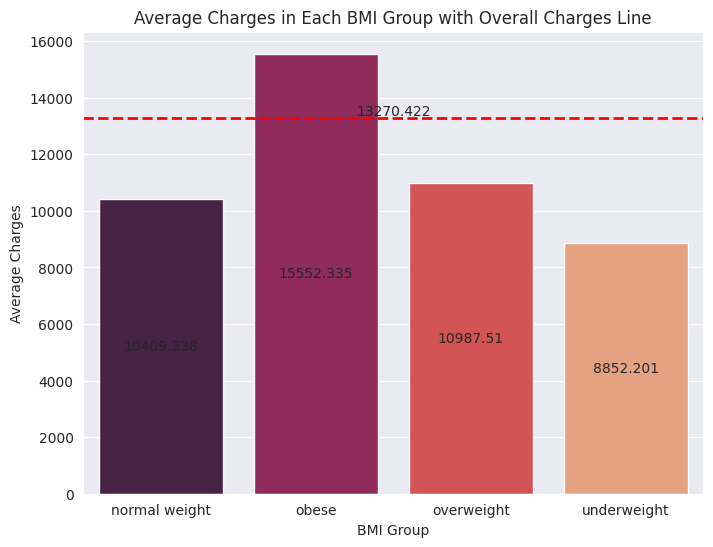

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="BMI Group",
    y="Charges",
    data=average_charges_by_bmi_group,
    hue="BMI Group",
    palette="rocket",
)
add_values(df_by_group=average_charges_by_bmi_group)
plt.axhline(
    average_charges,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Overall Average Charges",
)
add_value(df_by_group=average_charges_by_bmi_group, average_value=average_charges)
plt.title("Average Charges in Each BMI Group with Overall Charges Line")
plt.xlabel("BMI Group")
plt.ylabel("Average Charges")

plt.show()

## Conclusions

1. The greatest impact (strong linear association) on the cost of insurance has the variable **Smoker** - the Pearson correlation is equal to **0.79** (positive correlation). This means that smoking increase insurance costs. A second variable that also has an impact (linear correlation) is **Age** with a coefficient of **0.3** (higher age increases insurance costs).
2. **BMI** does not have a significant impact (**0.2**), as might be expected.
3. There is no significant difference in the cost insurance for each gender (**Sex** variable) and for people with or without children (**Has Children** variable).
4. Smokers have **3.8** times higher insurance costs than non-smoker.
5. The average insurance costs in the **Northeast** and **Southeast** regions are higher than the average insurance costs in the entire dataset.
6. People over **40** (**middle-aged adult** and **senior citizen**) have higher average insurance costs.
7. Obese people have the highest average insurance costs - more than **17%** higher than the average insurance costs for the entire dataset.